In [86]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Synthetic Data

In [87]:
M1 = 3
N1 = 2
A1 = np.random.normal(0,1,(M1,N1))
rank_A1 = np.linalg.matrix_rank(A1)
print(A1)
print(rank_A1)

[[ 2.01781958  1.02059201]
 [ 2.31587815  0.65219166]
 [-1.9439614  -2.03636311]]
2


# Generation of Dataset#1

In [88]:
#Part 2: Generation of Dataset#1
v1 = np.random.normal(0,1,(2,500))
X1 = np.matmul(A1,v1)
dim = np.shape(X1)
rank_X1 = np.linalg.matrix_rank(X1)
print("dimensionality:",dim)
print("rank:",rank_X1)

dimensionality: (3, 500)
rank: 2


# Singular Value Decomposition and Eigenvalue Decomposition of Dataset#1 

In [90]:
#Singular Value Decomposition
u1,s1,vh1 = np.linalg.svd(X1, True)

#Eigenvalue Decomposition
X1t = np.transpose(X1)
E1 = np.matmul(X1,X1t)
values1,vectors1 = np.linalg.eig(E1)
#Left Singular Values of X and Eigenvectors of XXT
print("U vs. Vectors")
print(u1)
print(vectors1)
print()

#Eigenvalues of XXT and Singular Values of X
print("Values vs. Singular")
print(values1)
print(np.square(s1))
print()

#Energy of X
print("Energy of X")
energy1 = np.sum(np.square(s1))
print(energy1)
print()

#Left Singular Values of X and A
print("Left Singular Values of X and A")
print(u1)
print(A1)

U vs. Vectors
[[-0.53212627 -0.19375348  0.82419732]
 [-0.54335984 -0.66840053 -0.50793781]
 [ 0.64930864 -0.71812278  0.25039562]]
[[ 0.53212627  0.82419732  0.19375348]
 [ 0.54335984 -0.50793781  0.66840053]
 [-0.64930864  0.25039562  0.71812278]]

Values vs. Singular
[ 9.13974314e+03 -3.91517974e-13  5.08015645e+02]
[9.13974314e+03 5.08015645e+02 7.14161070e-29]

Energy of X
9647.758789344178

Left Singular Values of X and A
[[-0.53212627 -0.19375348  0.82419732]
 [-0.54335984 -0.66840053 -0.50793781]
 [ 0.64930864 -0.71812278  0.25039562]]
[[ 2.01781958  1.02059201]
 [ 2.31587815  0.65219166]
 [-1.9439614  -2.03636311]]


A possible reason for why none of the singular values are exactly zero is due to inherent noise in the data, which causes slight variations in the third direction as well. 

Relationship between left singular values of X and A: A is equal to the product of the left singular values matrix and the transpose of the left singular values matrix. 
A = U*U.T

# Part 4: PCA of Dataset 1

Necessary Number of Principal Components: Two principal components should be enough to capture the variation in the data. The eigenvalues matrix indicates that the the third component of the matrix is almost zero. Therefore, the the first two elements of the matrix should be enough to capture a majority of the variation. 

In [122]:
#Expectation Values
e1 = np.mean(X1)
print("Expectation Value:",e1)

#Mean Vector
m1 = np.mean(X1,axis=1)
print("Mean Vector:")
print(m1)

#Top Two Principal Components
pc1 = np.argsort(values1)[::-1]
pc1 = np.delete(pc1,np.argmin(values1))
U1 = vectors1[:,pc1]
print("Principal Components:")
print(U1)

#Feature Vectors
X1i = np.matmul(U1.T,X1)

#Reconstructed original data
print("Reconstructed X Matrix:")
X1_reconstructed = np.matmul(U1,X1i)
print(X1_reconstructed)

#Original Data
print("Original Data")
print(X1)


#Representation Error
rep_error1 = np.square(np.linalg.norm(X1_reconstructed-X1))
print("Representation Error:",rep_error1)

Expectation Value: 0.019788467004584354
Mean Vector:
[-0.07394957 -0.03635281  0.16966779]
Principal Components:
[[ 0.53212627  0.82419732]
 [ 0.54335984 -0.50793781]
 [-0.64930864  0.25039562]]
Reconstructed X Matrix:
[[ 3.47790869  1.14839408 -1.81952802 ...  1.68016175 -2.34574802
   3.69773842]
 [ 3.55132987  1.17263752 -1.85793958 ...  1.71563118 -2.39526846
   3.77580037]
 [-4.24379756 -1.40128808  2.22021601 ... -2.05015915  2.86231773
  -4.51203717]]
Original Data
[[ 3.22074243  1.35452028 -1.84227313 ...  1.55778368 -2.29561742
   3.71656796]
 [ 2.6641713   1.88372079 -1.93640446 ...  1.29345779 -2.22233056
   3.84075752]
 [-5.19695177 -0.6373074   2.13591413 ... -2.50373798  3.04812046
  -4.44224786]]
Representation Error: 508.01564511185364


In [92]:
#Top Principal Component
values2 = np.delete(values1,np.argmin(values1))
pc2 = np.delete(pc1,np.argmin(values2))
U2 = vectors1[:,pc2]
print("Top Principal Component:")
print(U2)

#Feature Vectors
X2i = np.matmul(U1.T,X1)

#Reconstructed original data
X2_reconstructed = np.matmul(U1,X1i)
print("Reconstructed X matrix:")
print(X2_reconstructed)

#Original Data
print("Original X matrix:")
print(X1)

#Representation Error
rep_error2 = np.square(np.linalg.norm(X2_reconstructed-X1))
print("Representation Error: ",rep_error2)

Top Principal Component:
[[ 0.53212627]
 [ 0.54335984]
 [-0.64930864]]
Reconstructed X matrix:
[[ 3.47790869  1.14839408 -1.81952802 ...  1.68016175 -2.34574802
   3.69773842]
 [ 3.55132987  1.17263752 -1.85793958 ...  1.71563118 -2.39526846
   3.77580037]
 [-4.24379756 -1.40128808  2.22021601 ... -2.05015915  2.86231773
  -4.51203717]]
Original X matrix:
[[ 3.22074243  1.35452028 -1.84227313 ...  1.55778368 -2.29561742
   3.71656796]
 [ 2.6641713   1.88372079 -1.93640446 ...  1.29345779 -2.22233056
   3.84075752]
 [-5.19695177 -0.6373074   2.13591413 ... -2.50373798  3.04812046
  -4.44224786]]
Representation Error:  508.01564511185364


Text(0.5,0.92,'Scatter Plot of Reconstructed Data')

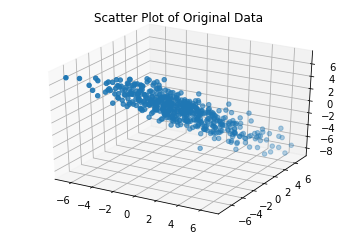

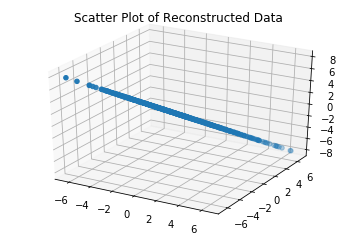

In [93]:
#3D Scatter Plots
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
x1data = X1[0,:]
y1data = X1[1,:]
z1data = X1[2,:]
ax1.scatter(x1data,y1data,z1data)
ax1.set_title('Scatter Plot of Original Data')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111,projection='3d')
x2data = X2_reconstructed[0,:]
y2data = X2_reconstructed[1,:]
z2data = X2_reconstructed[2,:]
ax2.scatter(x2data,y2data,z2data)
ax2.set_title('Scatter Plot of Reconstructed Data')

# Generation of Dataset #2

In [94]:
M5 = 3
N5 = 500
c5 = np.random.normal(0,3,(M5,N5))
v5 = np.random.normal(0,1,(2,500))
x5 = np.matmul(A1,v5) + c5
rank_x5 = np.linalg.matrix_rank(x5)
print("Rank of x=Av+c: ",rank_x5)

Rank of x=Av+c:  3


# PCA,Centering, and Dataset #2

In [123]:
#Uncentered Data: 
#Singular Value Decomposition
u5,s5,vh5 = np.linalg.svd(x5, True)

#Eigenvalue Decomposition
x5t = np.transpose(x5)
E5 = np.matmul(x5,x5t)
values5,vectors5 = np.linalg.eig(E5)

#Top Two Principal Components
pc5 = np.argsort(values5)[::-1]
pc5 = np.delete(pc5,np.argmin(pc5))
U5 = vectors5[:,pc5]
print("Principal Components:")
print(U5)
#Reconstructed Original Data
x5_reconstructed = np.matmul(U5,U5.T)
x5_reconstructed = np.matmul(x5_reconstructed,x5)
print("Reconstructed X Matrix:")
print(x5_reconstructed)

#Original Data
print("Original X Matrix")
print(x5)

#Representation Error
rep_error5 = np.square(np.linalg.norm(x5_reconstructed-x5))
print("Representation Error: ",rep_error5)

Principal Components:
[[ 0.14287786  0.83490268]
 [ 0.66693569 -0.47801768]
 [ 0.73128838  0.27283073]]
Reconstructed X Matrix:
[[-0.50417507  3.80979311  1.81528723 ...  0.5909903   1.91220491
  -1.94319176]
 [ 2.17164871 -2.57117649 -3.60682697 ... -3.28751542 -2.86667364
  -5.39751398]
 [ 1.55692542  0.88846504 -1.75434977 ... -2.50338421 -0.99519484
  -6.58738744]]
Original X Matrix
[[ -0.04006835   0.2646883    5.70863302 ...  -5.11806337   7.31173702
   -7.80774612]
 [  2.67071985  -6.38335891   0.57983186 ...  -9.42667213   2.93964309
  -11.70388634]
 [  1.01109571   5.05781542  -6.33326173 ...   4.2109575   -7.34551239
    0.30983656]]
Representation Error:  13095.595234085129


In [96]:
#Centered Data:

#Calculate mean
m5 = np.mean(x5,axis=0)
x5_centered = x5-m5

#Singular Value Decomposition
u5c,s5c,vh5c = np.linalg.svd(x5_centered, True)

#Eigenvalue Decomposition
x5t_centered = np.transpose(x5_centered)
E5c = np.matmul(x5_centered,x5t)
values_5c,vectors_5c = np.linalg.eig(E5c)

#Top Two Principal Components
pc_5c = np.argsort(values_5c)[::-1]
pc_5c = np.delete(pc_5c,np.argmin(pc_5c))
U5c = vectors_5c[:,pc_5c]
print("Top Two Principal Components")
print(U5c)

#Reconstructing original data
x5c_reconstructed = np.matmul(U5c,U5c.T)
x5c_reconstructed = np.matmul(x5c_reconstructed,x5_centered) + m5
print("Reconstructed Centered Data:")
print(x5c_reconstructed)

#Original Data:
print("Original Data Matrix:")
print(x5_centered)

#Representation Error
rep_error5c = np.square(np.linalg.norm(x5c_reconstructed-x5_centered))
print("Representation Error: ",rep_error5c)

Top Two Principal Components
[[ 0.71619941  0.5325965 ]
 [-0.69764912  0.46533943]
 [-0.01855029  0.70696548]]
Reconstructed Centered Data:
[[-0.22553056  3.62297873  2.09961098 ... -0.49047227  2.50517367
  -3.7485619 ]
 [ 2.48484773 -2.89948441 -3.19832305 ... -4.61252121 -2.08532922
  -7.48138253]
 [ 1.15508844  0.51578216 -0.8926095  ... -2.26898278 -0.21162908
  -5.36885011]]
Original Data Matrix:
[[-1.25398409  0.6183067   5.7235653  ... -1.6734707   6.34311445
  -1.40714748]
 [ 1.45680411 -6.02974051  0.59476414 ... -5.98207947  1.97102052
  -5.30328771]
 [-0.20282003  5.41143382 -6.31832944 ...  7.65555017 -8.31413496
   6.71043519]]
Representation Error:  16922.024352262968


# Generation of Dataset #3

In [97]:
v7 = np.random.normal(0,1,(2,500))
n7 = np.random.normal(0,.01,(3,500))
x7 = np.matmul(A1,v5) + n7

#Normalized Variant Form
norm = np.linalg.norm(x7, ord=2)
x_norm = x7/norm

#Rank of Normalized Data Matrix
print("Rank of Normalized X:",np.linalg.matrix_rank(x_norm))

#Rank of Singular Values of X
u7,s7,vh7 = np.linalg.svd(x_norm)
print("Rank of Singular values:",np.linalg.matrix_rank(u7))

Rank of Normalized X: 3
Rank of Singular values: 3


# PCA Denoising of Dataset #3

Text(0.5,0.92,'Scatter Plot of Normalized X')

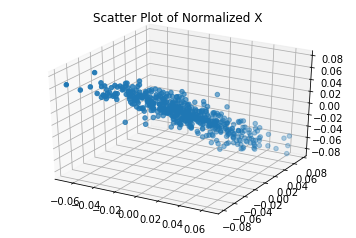

In [98]:
#3D Scatter Plot-normalized x
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
x3data = x_norm[0,:]
y3data = x_norm[1,:]
z3data = x_norm[2,:]
ax3.scatter3D(x3data,y3data,z3data)
ax3.set_title('Scatter Plot of Normalized X')

In [120]:
#Normalized Data Matrix Projection
values7,vectors7 = np.linalg.eig(np.matmul(x_norm,x_norm.T))

#Top Two Principal Components
pc7 = np.argsort(values7)[::-1]
pc7 = np.delete(pc7,np.argmin(pc7))
U7 = vectors7[:,pc7]
print("Principal Components:")
print(U7)
#Feature Vectors
x7i = np.matmul(U7.T,x_norm)

#Reconstructed Data
x7_reconstructed = np.matmul(U7,x7i)
print("Reconstructed X Matrix")
print(x7_reconstructed)

#Original Data
print("Original Data")
print(x_norm)


Principal Components:
[[ 0.18544332  0.82433449]
 [ 0.66075845 -0.50748577]
 [ 0.72733008  0.25086023]]
Reconstructed X Matrix
[[-1.29617671e-03 -8.25201592e-05 -2.47225084e-04 ... -6.73580477e-04
  -4.32944115e-03 -2.32503393e-03]
 [-4.76095753e-03 -4.71860998e-04 -1.85404817e-03 ... -2.63118916e-03
  -1.57185144e-02 -8.53550267e-03]
 [-5.20713622e-03 -4.77612310e-04 -1.81216106e-03 ... -2.84196747e-03
  -1.72335053e-02 -9.33644927e-03]]
Original Data
[[-0.01286257 -0.02883627  0.05280826 ... -0.01251473  0.02799981
  -0.00238787]
 [-0.01672039 -0.03020269  0.0530043  ... -0.01487471  0.01770932
  -0.00860047]
 [ 0.00860668  0.03386318 -0.06517665 ...  0.01129999 -0.05584454
  -0.00926141]]


Representation Error: 1.0
Singular Values of Normalized X: [1.         0.2196686  0.00227889]


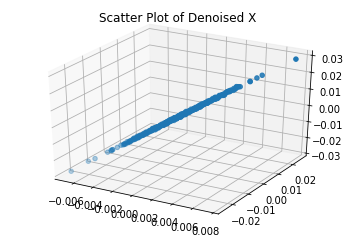

In [126]:
#3D Scatterplot- Denoised x 
fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
x4data = x7_reconstructed[0,:]
y4data = x7_reconstructed[1,:]
z4data = x7_reconstructed[2,:]
ax4.scatter(x4data,y4data,z4data)
ax4.set_title('Scatter Plot of Denoised X')

#Representation Error
rep_error7 = np.square(np.linalg.norm(x7_reconstructed-x_norm))
print("Representation Error:", rep_error7)

#Third Singular Value of normalized x
print("Singular Values of Normalized X:",s7)

# Real Data

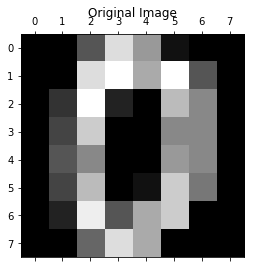

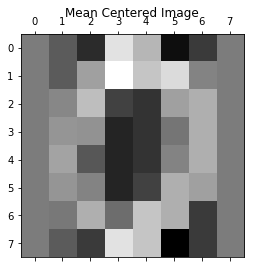

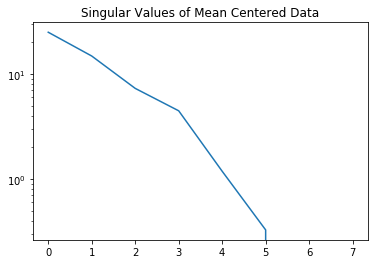

In [100]:
from sklearn.datasets import load_digits
images, labels = load_digits(1,return_X_y= True)
digits = load_digits()

plt.matshow(digits.images[0],cmap='gray')
plt.title('Original Image')
plt.show()
#Mean Centering
img_mean = np.mean(digits.images[0],axis=0)
img_centered = digits.images[0] - img_mean
plt.matshow(img_centered, cmap='gray')
plt.title('Mean Centered Image')
plt.show()
#Singular Value Decomposition
u9,s9,vh9 = np.linalg.svd(img_centered, True)
plt.title('Singular Values of Mean Centered Data')
plt.semilogy(s9)
plt.show()


In [128]:
#Energy of img_centered
energy9 = np.sum(np.square(np.linalg.norm(img_centered)))
energy9_adj = energy9*.9

#Smallest integer value 
total = 0
i=0
while total < energy9_adj:
    total = total + (s9.item(i,))**2
    i+=1
    
print("Smallest k integer value:",i+1)

Smallest k integer value: 3


(8, 3)


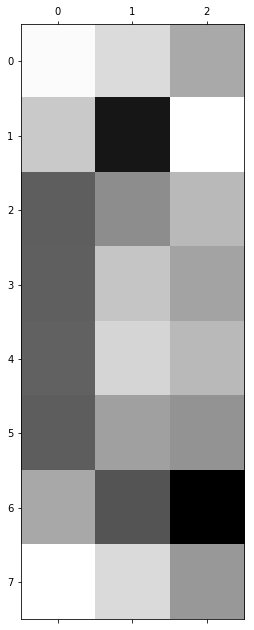

In [121]:
#Top Principal Components

#Eigenvalue Decomposition
values9,vectors9 = np.linalg.eig(np.matmul(img_centered, img_centered.T))

#Top 19 Principal Components
pc9 = np.argsort(values9)[::-1]
pc9 = pc9[0:3]
U9 = vectors9[:,pc9]
#Image of Principal Components
plt.matshow(U9,cmap='gray')
plt.show()


Text(0.5,0.92,'Scatter Plot of Feature Vectors ')

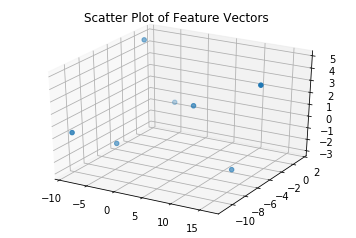

In [119]:
#Feature Vectors
x_img = np.matmul(U9.T,img_centered)

#3D Scatter Plot of Feature Vectors
fig5 = plt.figure()
ax5 = fig5.add_subplot(111, projection='3d')
x5data = x_img[0,:]
y5data = x_img[1,:]
z5data = x_img[2,:]
ax5.scatter3D(x4data,y4data,z4data)
ax5.set_title('Scatter Plot of Feature Vectors ')

In [109]:
#Reconstructed Matrix
x_imgr = np.matmul(U9,x_img)
print("Reconstructed X Matrix")
print(x_imgr)

#Representation Error
rep_error9 = np.square(np.linalg.norm(x_imgr-img_centered))
print("Representation Error:", rep_error9)

Reconstructed X Matrix
[[ 0.         -2.10013583 -5.21535031  6.95398457  4.33083241 -7.78516038
  -4.1285565   0.        ]
 [ 0.         -2.45980144  2.97119628  9.10227399  4.74786849  6.24176719
   0.40621762  0.        ]
 [ 0.          1.49784545  2.25762697 -4.44015919 -4.10008188  3.80710232
   3.69007056  0.        ]
 [ 0.          1.93435704  0.27434646 -6.08271549 -5.08986332  0.37270612
   3.07527417  0.        ]
 [ 0.          1.9169853  -0.58719773 -5.72301407 -5.63807061 -0.65642036
   3.48527503  0.        ]
 [ 0.          1.76674121  1.84193152 -5.79043559 -4.07013314  2.5974923
   2.7775639   0.        ]
 [ 0.         -0.37947464  3.64907621 -0.98351982  4.9190858   3.4170333
  -4.52312773  0.        ]
 [ 0.         -2.17651709 -5.1916294   6.9635856   4.90036225 -7.99452048
  -4.78271704  0.        ]]
Representation Error: 21.478008173160912


In [114]:
#Singular Values of Mean Centered X
print('Singular Values of X:', s9)
print('Relationship between The representation error is equivalent to the square of the fourth singular value of mean centered X.') 

Singular Values of X: [24.99021645 14.83851617  7.30270577  4.46767318  1.18750808  0.32822114
  0.          0.        ]
Relationship between The representation error is equivalent to the square of the fourth singular value of mean centered X.


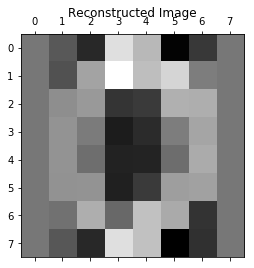

In [118]:
#Reconstructed image 
plt.matshow(x_imgr,cmap='gray')
plt.title('Reconstructed Image')
plt.show()